In [94]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

Código para mostrar todas as colunas, quando eu escrever display(df). Se eu não usar esse código, ele mostra apenas algumas colunas

In [95]:
pd.set_option('display.max_columns', None)

In [96]:
df=pd.read_csv("DE&CO_14_06.csv")
df.drop_duplicates(inplace=True)
len(df)

74355

In [97]:
df.drop(columns=['order_id.1','customer_id.1',"product_name_lenght","product_description_lenght","product_photos_qty"],inplace=True)

In [98]:
#display(df)

In [99]:
vazios=df.isnull().sum()
vazios


order_id                             0
customer_id                          0
order_status                         0
order_purchase_timestamp             0
order_approved_at                   14
order_delivered_carrier_date         1
order_delivered_customer_date        0
delivery_time                        0
delivery_time_model                  0
product_id                           0
product_category_name             1328
product_weight_g                    18
product_length_cm                   18
product_height_cm                   18
product_width_cm                    18
seller_id                            0
seller_zip_code_prefix               0
seller_city                          0
seller_state                         0
payment_sequential                   0
payment_type                         0
payment_installments                 0
payment_value                        0
customer_unique_id                   0
customer_zip_code_prefix             0
customer_city            

Como não falta nenum zip_code_prefix, e faltaa bastante informação da cidade e estado, acredito que faça sentido fazer um drop de ["customer_city","customer_state"], já que essa informação é vazia em diversos casos, mas está contida no zip_code


In [100]:
df.drop(columns=["customer_city","customer_state","seller_city","seller_state"], inplace=True)

In [101]:
vazios=df.isnull().sum()
vazios

order_id                            0
customer_id                         0
order_status                        0
order_purchase_timestamp            0
order_approved_at                  14
order_delivered_carrier_date        1
order_delivered_customer_date       0
delivery_time                       0
delivery_time_model                 0
product_id                          0
product_category_name            1328
product_weight_g                   18
product_length_cm                  18
product_height_cm                  18
product_width_cm                   18
seller_id                           0
seller_zip_code_prefix              0
payment_sequential                  0
payment_type                        0
payment_installments                0
payment_value                       0
customer_unique_id                  0
customer_zip_code_prefix            0
dtype: int64

In [102]:
df=df[df["order_approved_at"].notnull()]


In [103]:
df.loc[df["product_height_cm"].isnull(),["product_height_cm","product_weight_g","product_length_cm","product_width_cm"]]
#type(df.loc[5139,"product_height_cm"])

,product_height_cm,product_weight_g,product_length_cm,product_width_cm
5139,NaN,NaN,NaN,NaN
6672,NaN,NaN,NaN,NaN
20896,NaN,NaN,NaN,NaN
28674,NaN,NaN,NaN,NaN
35217,NaN,NaN,NaN,NaN
35594,NaN,NaN,NaN,NaN
42648,NaN,NaN,NaN,NaN
51606,NaN,NaN,NaN,NaN
53349,NaN,NaN,NaN,NaN
60037,NaN,NaN,NaN,NaN


Percebo que essas 18 entregas não possuem nenhuma informação de dimensão. Como são apenas 18, faz sentido remover essas linhas.

In [104]:
df=df[df["product_height_cm"].notnull()]
df.isnull().sum()

order_id                            0
customer_id                         0
order_status                        0
order_purchase_timestamp            0
order_approved_at                   0
order_delivered_carrier_date        1
order_delivered_customer_date       0
delivery_time                       0
delivery_time_model                 0
product_id                          0
product_category_name            1310
product_weight_g                    0
product_length_cm                   0
product_height_cm                   0
product_width_cm                    0
seller_id                           0
seller_zip_code_prefix              0
payment_sequential                  0
payment_type                        0
payment_installments                0
payment_value                       0
customer_unique_id                  0
customer_zip_code_prefix            0
dtype: int64

In [105]:
display(df)

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,delivery_time,delivery_time_model,product_id,product_category_name,product_weight_g,product_length_cm,product_height_cm,product_width_cm,seller_id,seller_zip_code_prefix,payment_sequential,payment_type,payment_installments,payment_value,customer_unique_id,customer_zip_code_prefix
0,00010242fe8c5a6d1ba2dd792cb16214,3ce436f183e68e07877b285a838db11a,delivered,2017-09-13 08:59:02.000,2017-09-13 09:45:35.000,2017-09-19 18:34:16.000,2017-09-20 23:43:48.000,7.61,15.63,4244733e06e7ecb4970a6e2683c13e61,cool_stuff,650.0,28.0,9.0,14.0,48436dade18ac8b2bce089ec2a041202,27277,1,credit_card,2,72.19,871766c5855e863f6eccc05f988b23cb,28013
1,00018f77f2f0320c557190d7a144bdd3,f6dd3ec061db4e3987629fe6b26e5cce,delivered,2017-04-26 10:53:06.000,2017-04-26 11:05:13.000,2017-05-04 14:35:00.000,2017-05-12 16:04:24.000,16.22,18.55,e5f2d52b802189ee658865ca93d83a8f,pet_shop,30000.0,50.0,30.0,40.0,dd7ddc04e1b6c2c614352b383efe2d36,3471,1,credit_card,3,259.83,eb28e67c4c0b83846050ddfb8a35d051,15775
2,000229ec398224ef6ca0657da4fc703e,6489ae5e4333f3693df5ad4372dab6d3,delivered,2018-01-14 14:33:31.000,2018-01-14 14:48:30.000,2018-01-16 12:36:48.000,2018-01-22 13:19:16.000,7.95,21.39,c777355d18b72b67abbeef9df44fd0fd,moveis_decoracao,3050.0,33.0,13.0,33.0,5b51032eddd242adc84c38acab88f23d,37564,1,credit_card,5,216.87,3818d81c6709e39d06b2738a8d3a2474,35661
3,00042b26cf59d7ce69dfabb4e55b4fd9,58dbd0b2d70206bf40e62cd34e84d795,delivered,2017-02-04 13:57:51.000,2017-02-04 14:10:13.000,2017-02-16 09:46:09.000,2017-03-01 16:42:31.000,25.11,40.42,ac6c3623068f30de03045865e4e10089,ferramentas_jardim,3750.0,35.0,40.0,30.0,df560393f3a51e74553ab94004ba5c87,87900,1,credit_card,3,218.04,64b576fb70d441e8f1b2d7d446e483c5,13226
4,00048cc3ae777c65dbb7d2a0634bc1ea,816cbea969fe5b689b39cfc97a506742,delivered,2017-05-15 21:42:34.000,2017-05-17 03:55:27.000,2017-05-17 11:05:55.000,2017-05-22 13:44:35.000,6.67,21.10,ef92defde845ab8450f9d70c526ef70f,utilidades_domesticas,450.0,24.0,8.0,15.0,6426d21aca402a131fc0a5d0960a3c90,14091,1,boleto,1,34.59,85c835d128beae5b4ce8602c491bf385,38017
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
81760,fffb0b1a50e65c449020434fa835e078,46b385c6d972b73cbcf797a8b16c072d,delivered,2017-04-12 16:35:43.000,2017-04-12 16:45:12.000,2017-04-27 09:26:54.000,2017-05-17 11:38:22.000,34.79,32.31,e7be84ea9462aac5e2b0b08eb35ba7f1,instrumentos_musicais,100.0,60.0,16.0,11.0,36a968b544695394e4e9d7572688598f,11010,1,credit_card,1,15.86,b2d2b4204f7fc4b4aeca38e3cd680a7e,13083
81761,fffb2ef8874127f75b52b643880fd7e0,ca8374c00203cec663bc1eabf0aaede4,delivered,2018-03-30 15:36:49.000,2018-04-03 05:08:33.000,2018-04-03 15:12:19.000,2018-04-16 16:56:38.000,17.06,27.35,ebceb9726cf5c6187b48e17fe58747b0,cama_mesa_banho,200.0,25.0,5.0,18.0,609e1a9a6c2539919b8205cf7c4e6ff0,88359,1,boleto,1,39.96,6b42acb204802253acec6607ff3a9e0b,28540
81762,fffb9224b6fc7c43ebb0904318b10b5f,4d3abb73ceb86353aeadbe698aa9d5cb,delivered,2017-10-27 16:51:00.000,2017-10-28 02:55:58.000,2017-11-10 19:31:52.000,2017-11-17 19:41:42.000,21.12,30.30,43423cdffde7fda63d0414ed38c11a73,relogios_presentes,350.0,16.0,14.0,11.0,b1fc4f64df5a0e8b6913ab38803c57a9,24440,1,boleto,1,356.76,f736308cd9952b33b90b9fe94da9c8f5,56912
81766,fffce4705a9662cd70adb13d4a31832d,29309aa813182aaddc9b259e31b870e6,delivered,2017-10-23 17:07:56.000,2017-10-24 17:14:25.000,2017-10-26 15:13:14.000,2017-10-28 12:22:22.000,4.80,17.29,72a30483855e2eafc67aee5dc2560482,esporte_lazer,967.0,21.0,24.0,19.0,c3cfdc648177fdbbbb35635a37472c53,80610,1,credit_card,3,116.85,cd79b407828f02fdbba457111c38e4c4,4039


In [106]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 74323 entries, 0 to 81767
Data columns (total 23 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   order_id                       74323 non-null  object 
 1   customer_id                    74323 non-null  object 
 2   order_status                   74323 non-null  object 
 3   order_purchase_timestamp       74323 non-null  object 
 4   order_approved_at              74323 non-null  object 
 5   order_delivered_carrier_date   74322 non-null  object 
 6   order_delivered_customer_date  74323 non-null  object 
 7   delivery_time                  74323 non-null  float64
 8   delivery_time_model            74323 non-null  float64
 9   product_id                     74323 non-null  object 
 10  product_category_name          73013 non-null  object 
 11  product_weight_g               74323 non-null  float64
 12  product_length_cm              74323 non-null  floa

Trabalhando um pouco sobre as colunas de data

In [107]:

df["order_purchase_timestamp"]=pd.to_datetime(df["order_purchase_timestamp"])
df["order_approved_at"]=pd.to_datetime(df["order_approved_at"])
df["order_delivered_carrier_date"]=pd.to_datetime(df["order_delivered_carrier_date"])
df["order_delivered_customer_date"]=pd.to_datetime(df["order_delivered_customer_date"])
display(df)

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,delivery_time,delivery_time_model,product_id,product_category_name,product_weight_g,product_length_cm,product_height_cm,product_width_cm,seller_id,seller_zip_code_prefix,payment_sequential,payment_type,payment_installments,payment_value,customer_unique_id,customer_zip_code_prefix
0,00010242fe8c5a6d1ba2dd792cb16214,3ce436f183e68e07877b285a838db11a,delivered,2017-09-13 08:59:02,2017-09-13 09:45:35,2017-09-19 18:34:16,2017-09-20 23:43:48,7.61,15.63,4244733e06e7ecb4970a6e2683c13e61,cool_stuff,650.0,28.0,9.0,14.0,48436dade18ac8b2bce089ec2a041202,27277,1,credit_card,2,72.19,871766c5855e863f6eccc05f988b23cb,28013
1,00018f77f2f0320c557190d7a144bdd3,f6dd3ec061db4e3987629fe6b26e5cce,delivered,2017-04-26 10:53:06,2017-04-26 11:05:13,2017-05-04 14:35:00,2017-05-12 16:04:24,16.22,18.55,e5f2d52b802189ee658865ca93d83a8f,pet_shop,30000.0,50.0,30.0,40.0,dd7ddc04e1b6c2c614352b383efe2d36,3471,1,credit_card,3,259.83,eb28e67c4c0b83846050ddfb8a35d051,15775
2,000229ec398224ef6ca0657da4fc703e,6489ae5e4333f3693df5ad4372dab6d3,delivered,2018-01-14 14:33:31,2018-01-14 14:48:30,2018-01-16 12:36:48,2018-01-22 13:19:16,7.95,21.39,c777355d18b72b67abbeef9df44fd0fd,moveis_decoracao,3050.0,33.0,13.0,33.0,5b51032eddd242adc84c38acab88f23d,37564,1,credit_card,5,216.87,3818d81c6709e39d06b2738a8d3a2474,35661
3,00042b26cf59d7ce69dfabb4e55b4fd9,58dbd0b2d70206bf40e62cd34e84d795,delivered,2017-02-04 13:57:51,2017-02-04 14:10:13,2017-02-16 09:46:09,2017-03-01 16:42:31,25.11,40.42,ac6c3623068f30de03045865e4e10089,ferramentas_jardim,3750.0,35.0,40.0,30.0,df560393f3a51e74553ab94004ba5c87,87900,1,credit_card,3,218.04,64b576fb70d441e8f1b2d7d446e483c5,13226
4,00048cc3ae777c65dbb7d2a0634bc1ea,816cbea969fe5b689b39cfc97a506742,delivered,2017-05-15 21:42:34,2017-05-17 03:55:27,2017-05-17 11:05:55,2017-05-22 13:44:35,6.67,21.10,ef92defde845ab8450f9d70c526ef70f,utilidades_domesticas,450.0,24.0,8.0,15.0,6426d21aca402a131fc0a5d0960a3c90,14091,1,boleto,1,34.59,85c835d128beae5b4ce8602c491bf385,38017
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
81760,fffb0b1a50e65c449020434fa835e078,46b385c6d972b73cbcf797a8b16c072d,delivered,2017-04-12 16:35:43,2017-04-12 16:45:12,2017-04-27 09:26:54,2017-05-17 11:38:22,34.79,32.31,e7be84ea9462aac5e2b0b08eb35ba7f1,instrumentos_musicais,100.0,60.0,16.0,11.0,36a968b544695394e4e9d7572688598f,11010,1,credit_card,1,15.86,b2d2b4204f7fc4b4aeca38e3cd680a7e,13083
81761,fffb2ef8874127f75b52b643880fd7e0,ca8374c00203cec663bc1eabf0aaede4,delivered,2018-03-30 15:36:49,2018-04-03 05:08:33,2018-04-03 15:12:19,2018-04-16 16:56:38,17.06,27.35,ebceb9726cf5c6187b48e17fe58747b0,cama_mesa_banho,200.0,25.0,5.0,18.0,609e1a9a6c2539919b8205cf7c4e6ff0,88359,1,boleto,1,39.96,6b42acb204802253acec6607ff3a9e0b,28540
81762,fffb9224b6fc7c43ebb0904318b10b5f,4d3abb73ceb86353aeadbe698aa9d5cb,delivered,2017-10-27 16:51:00,2017-10-28 02:55:58,2017-11-10 19:31:52,2017-11-17 19:41:42,21.12,30.30,43423cdffde7fda63d0414ed38c11a73,relogios_presentes,350.0,16.0,14.0,11.0,b1fc4f64df5a0e8b6913ab38803c57a9,24440,1,boleto,1,356.76,f736308cd9952b33b90b9fe94da9c8f5,56912
81766,fffce4705a9662cd70adb13d4a31832d,29309aa813182aaddc9b259e31b870e6,delivered,2017-10-23 17:07:56,2017-10-24 17:14:25,2017-10-26 15:13:14,2017-10-28 12:22:22,4.80,17.29,72a30483855e2eafc67aee5dc2560482,esporte_lazer,967.0,21.0,24.0,19.0,c3cfdc648177fdbbbb35635a37472c53,80610,1,credit_card,3,116.85,cd79b407828f02fdbba457111c38e4c4,4039


In [108]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 74323 entries, 0 to 81767
Data columns (total 23 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   order_id                       74323 non-null  object        
 1   customer_id                    74323 non-null  object        
 2   order_status                   74323 non-null  object        
 3   order_purchase_timestamp       74323 non-null  datetime64[ns]
 4   order_approved_at              74323 non-null  datetime64[ns]
 5   order_delivered_carrier_date   74322 non-null  datetime64[ns]
 6   order_delivered_customer_date  74323 non-null  datetime64[ns]
 7   delivery_time                  74323 non-null  float64       
 8   delivery_time_model            74323 non-null  float64       
 9   product_id                     74323 non-null  object        
 10  product_category_name          73013 non-null  object        
 11  product_weight_g    

In [109]:
df.loc[0,"order_approved_at"]-df.loc[0,"order_purchase_timestamp"]


Timedelta('0 days 00:46:33')

In [110]:
df[df["order_status"]=="canceled"]

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,delivery_time,delivery_time_model,product_id,product_category_name,product_weight_g,product_length_cm,product_height_cm,product_width_cm,seller_id,seller_zip_code_prefix,payment_sequential,payment_type,payment_installments,payment_value,customer_unique_id,customer_zip_code_prefix
8024,1950d777989f6a877539f53795b4c3c3,1bccb206de9f0f25adc6871a1bcf77b2,canceled,2018-02-19 19:48:52,2018-02-19 20:56:05,2018-02-20 19:57:13,2018-03-21 22:03:51,30.09,17.17,e435ceb7ced9b8446defd858630454ed,beleza_saude,440.0,20.0,11.0,17.0,2a61c271b1ac763450d846849783e922,9175,1,credit_card,2,44.09,6a04c8339c44b23e189446216a494569,32071
14027,2c45c33d2f9cb8ff8b1c86cc28c11c30,de4caa97afa80c8eeac2ff4c8da5b72e,canceled,2016-10-09 15:39:56,2016-10-10 10:40:49,2016-10-14 10:40:50,2016-11-09 14:53:50,30.97,59.35,e24f73b7631ee3fbb2ab700a9acaa258,fashion_bolsas_e_acessorios,2250.0,22.0,15.0,20.0,0cbcee27c791afa0cdcb08587a2013a8,37410,1,credit_card,3,153.51,d93a22bb52bb2f41a7267b8a02370781,88058
32558,65d1e226dfaeb8cdc42f665422522d14,70fc57eeae292675927697fe03ad3ff5,canceled,2016-10-03 21:01:41,2016-10-04 10:18:57,2016-10-25 12:14:28,2016-11-08 10:58:34,35.58,52.12,9c7bdf67b06b419aefb93cfdfc96c55d,esporte_lazer,476.0,17.0,14.0,14.0,ed49da7cadefc454d6a67de249eab240,5571,1,credit_card,1,35.61,b8b8726af116a5cfb35b0315ecef9172,22770
37972,770d331c84e5b214bd9dc70a10b829d0,6c57e6119369185e575b36712766b0ef,canceled,2016-10-07 14:52:30,2016-10-07 15:07:10,2016-10-11 15:07:11,2016-10-14 15:07:11,7.01,52.38,eba7488e1c67729f045ab43fac426f2e,perfumaria,610.0,22.0,14.0,16.0,620c87c171fb2a6dd6e8bb4dec959fc6,25645,1,credit_card,2,263.93,59a7bb642795ddc85534fbd5f7360334,20091
44553,8beb59392e21af5eb9547ae1a9938d06,bf609b5741f71697f65ce3852c5d2623,canceled,2016-10-08 20:17:50,2016-10-09 14:34:30,2016-10-14 22:45:26,2016-10-19 18:47:43,10.94,52.15,c66def7098f4d87751f40c3a4855ced1,brinquedos,2100.0,22.0,50.0,32.0,46dc3b2cc0980fb8ec44634e21d2718e,22240,1,credit_card,5,111.22,f9af3bfab584769f34c314b222d34263,20091
69918,dabf2b0e35b423f94618bf965fcb7514,5cdec0bb8cbdf53ffc8fdc212cd247c6,canceled,2016-10-09 00:56:52,2016-10-09 13:36:58,2016-10-13 13:36:59,2016-10-16 14:36:59,7.57,51.96,473795a355d29305c3ea6b156833adf5,perfumaria,100.0,20.0,20.0,20.0,620c87c171fb2a6dd6e8bb4dec959fc6,25645,1,credit_card,2,140.22,2f96790fba243100730c8d1185dd2f25,5846
69919,dabf2b0e35b423f94618bf965fcb7514,5cdec0bb8cbdf53ffc8fdc212cd247c6,canceled,2016-10-09 00:56:52,2016-10-09 13:36:58,2016-10-13 13:36:59,2016-10-16 14:36:59,7.57,51.96,7cd29da0653abeb444703cc5a957f479,beleza_saude,1029.0,20.0,15.0,17.0,620c87c171fb2a6dd6e8bb4dec959fc6,25645,1,credit_card,2,140.22,2f96790fba243100730c8d1185dd2f25,5846


In [111]:
#Criando colunas para analisar o tempo dedicado a cada etapa


PEDIDO_APROVAÇÃO=df["order_approved_at"]-df["order_purchase_timestamp"]
PA2=[]
for elem in PEDIDO_APROVAÇÃO:
    elem=elem.total_seconds()/(24*3600)
    elem=round(elem,2)
    PA2.append(elem)



SEPARAÇÃO_DO_PEDIDO=df["order_delivered_carrier_date"]-df["order_approved_at"]
SDP2=[]
for elem in SEPARAÇÃO_DO_PEDIDO:
    elem=elem.total_seconds()/(24*3600)
    elem=round(elem,2)
    SDP2.append(elem)


PEDIDO_TRANSPORTE=df["order_delivered_customer_date"] - df["order_delivered_carrier_date"]
PT2=[]
for elem in PEDIDO_TRANSPORTE:
    elem=elem.total_seconds()/(24*3600)
    elem=round(elem,2)
    PT2.append(elem)

df.insert(4,"Pedido em aprovação",PA2)
df.insert(6,"Separando o pedido",SDP2)
df.insert(8,"Pedido em transporte",PT2)
df

,order_id,customer_id,order_status,order_purchase_timestamp,Pedido em aprovação,order_approved_at,Separando o pedido,order_delivered_carrier_date,Pedido em transporte,order_delivered_customer_date,delivery_time,delivery_time_model,product_id,product_category_name,product_weight_g,product_length_cm,product_height_cm,product_width_cm,seller_id,seller_zip_code_prefix,payment_sequential,payment_type,payment_installments,payment_value,customer_unique_id,customer_zip_code_prefix
0,00010242fe8c5a6d1ba2dd792cb16214,3ce436f183e68e07877b285a838db11a,delivered,2017-09-13 08:59:02,0.03,2017-09-13 09:45:35,6.37,2017-09-19 18:34:16,1.21,2017-09-20 23:43:48,7.61,15.63,4244733e06e7ecb4970a6e2683c13e61,cool_stuff,650.0,28.0,9.0,14.0,48436dade18ac8b2bce089ec2a041202,27277,1,credit_card,2,72.19,871766c5855e863f6eccc05f988b23cb,28013
1,00018f77f2f0320c557190d7a144bdd3,f6dd3ec061db4e3987629fe6b26e5cce,delivered,2017-04-26 10:53:06,0.01,2017-04-26 11:05:13,8.15,2017-05-04 14:35:00,8.06,2017-05-12 16:04:24,16.22,18.55,e5f2d52b802189ee658865ca93d83a8f,pet_shop,30000.0,50.0,30.0,40.0,dd7ddc04e1b6c2c614352b383efe2d36,3471,1,credit_card,3,259.83,eb28e67c4c0b83846050ddfb8a35d051,15775
2,000229ec398224ef6ca0657da4fc703e,6489ae5e4333f3693df5ad4372dab6d3,delivered,2018-01-14 14:33:31,0.01,2018-01-14 14:48:30,1.91,2018-01-16 12:36:48,6.03,2018-01-22 13:19:16,7.95,21.39,c777355d18b72b67abbeef9df44fd0fd,moveis_decoracao,3050.0,33.0,13.0,33.0,5b51032eddd242adc84c38acab88f23d,37564,1,credit_card,5,216.87,3818d81c6709e39d06b2738a8d3a2474,35661
3,00042b26cf59d7ce69dfabb4e55b4fd9,58dbd0b2d70206bf40e62cd34e84d795,delivered,2017-02-04 13:57:51,0.01,2017-02-04 14:10:13,11.82,2017-02-16 09:46:09,13.29,2017-03-01 16:42:31,25.11,40.42,ac6c3623068f30de03045865e4e10089,ferramentas_jardim,3750.0,35.0,40.0,30.0,df560393f3a51e74553ab94004ba5c87,87900,1,credit_card,3,218.04,64b576fb70d441e8f1b2d7d446e483c5,13226
4,00048cc3ae777c65dbb7d2a0634bc1ea,816cbea969fe5b689b39cfc97a506742,delivered,2017-05-15 21:42:34,1.26,2017-05-17 03:55:27,0.30,2017-05-17 11:05:55,5.11,2017-05-22 13:44:35,6.67,21.10,ef92defde845ab8450f9d70c526ef70f,utilidades_domesticas,450.0,24.0,8.0,15.0,6426d21aca402a131fc0a5d0960a3c90,14091,1,boleto,1,34.59,85c835d128beae5b4ce8602c491bf385,38017
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
81760,fffb0b1a50e65c449020434fa835e078,46b385c6d972b73cbcf797a8b16c072d,delivered,2017-04-12 16:35:43,0.01,2017-04-12 16:45:12,14.70,2017-04-27 09:26:54,20.09,2017-05-17 11:38:22,34.79,32.31,e7be84ea9462aac5e2b0b08eb35ba7f1,instrumentos_musicais,100.0,60.0,16.0,11.0,36a968b544695394e4e9d7572688598f,11010,1,credit_card,1,15.86,b2d2b4204f7fc4b4aeca38e3cd680a7e,13083
81761,fffb2ef8874127f75b52b643880fd7e0,ca8374c00203cec663bc1eabf0aaede4,delivered,2018-03-30 15:36:49,3.56,2018-04-03 05:08:33,0.42,2018-04-03 15:12:19,13.07,2018-04-16 16:56:38,17.06,27.35,ebceb9726cf5c6187b48e17fe58747b0,cama_mesa_banho,200.0,25.0,5.0,18.0,609e1a9a6c2539919b8205cf7c4e6ff0,88359,1,boleto,1,39.96,6b42acb204802253acec6607ff3a9e0b,28540
81762,fffb9224b6fc7c43ebb0904318b10b5f,4d3abb73ceb86353aeadbe698aa9d5cb,delivered,2017-10-27 16:51:00,0.42,2017-10-28 02:55:58,13.69,2017-11-10 19:31:52,7.01,2017-11-17 19:41:42,21.12,30.30,43423cdffde7fda63d0414ed38c11a73,relogios_presentes,350.0,16.0,14.0,11.0,b1fc4f64df5a0e8b6913ab38803c57a9,24440,1,boleto,1,356.76,f736308cd9952b33b90b9fe94da9c8f5,56912
81766,fffce4705a9662cd70adb13d4a31832d,29309aa813182aaddc9b259e31b870e6,delivered,2017-10-23 17:07:56,1.00,2017-10-24 17:14:25,1.92,2017-10-26 15:13:14,1.88,2017-10-28 12:22:22,4.80,17.29,72a30483855e2eafc67aee5dc2560482,esporte_lazer,967.0,21.0,24.0,19.0,c3cfdc648177fdbbbb35635a37472c53,80610,1,credit_card,3,116.85,cd79b407828f02fdbba457111c38e4c4,4039


Analisando um pouco a distribuição de delivery_time

<Axes: xlabel='delivery_time', ylabel='Count'>

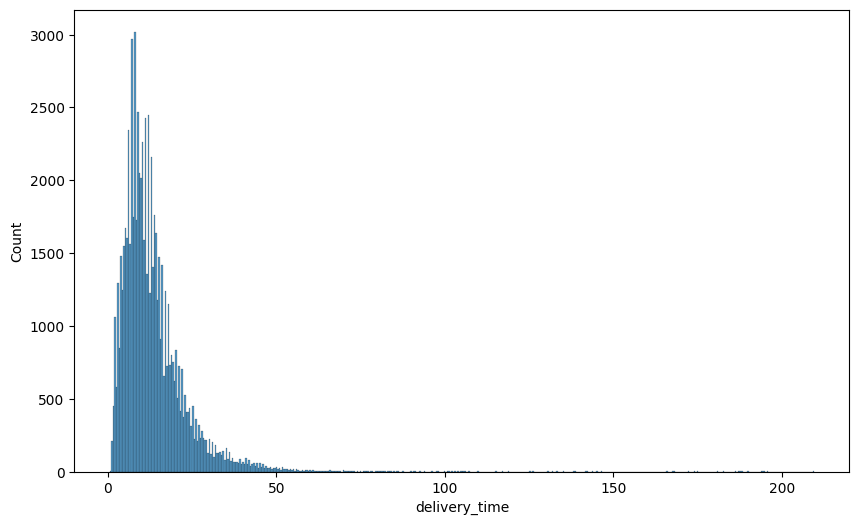

In [112]:
plt.figure(figsize=(10,6))
sns.histplot(df["delivery_time"])

In [113]:
df["delivery_time"].describe()


count    74323.000000
mean        13.378747
std          9.707094
min          0.530000
25%          7.270000
50%         11.180000
75%         16.790000
max        209.630000
Name: delivery_time, dtype: float64

Acima de 31,07



In [114]:
def outliers(coluna):
    q1=np.percentile(df[coluna],25)
    q3=np.percentile(df[coluna],75)

    iqr=q3-q1
    out_sup=q3+iqr*1.5
    out_inf=q1-iqr*1.5
    return(out_inf,out_sup)

out_inf,out_sup=outliers("delivery_time")

In [115]:
df=df[df["delivery_time"]<out_sup]
df

,order_id,customer_id,order_status,order_purchase_timestamp,Pedido em aprovação,order_approved_at,Separando o pedido,order_delivered_carrier_date,Pedido em transporte,order_delivered_customer_date,delivery_time,delivery_time_model,product_id,product_category_name,product_weight_g,product_length_cm,product_height_cm,product_width_cm,seller_id,seller_zip_code_prefix,payment_sequential,payment_type,payment_installments,payment_value,customer_unique_id,customer_zip_code_prefix
0,00010242fe8c5a6d1ba2dd792cb16214,3ce436f183e68e07877b285a838db11a,delivered,2017-09-13 08:59:02,0.03,2017-09-13 09:45:35,6.37,2017-09-19 18:34:16,1.21,2017-09-20 23:43:48,7.61,15.63,4244733e06e7ecb4970a6e2683c13e61,cool_stuff,650.0,28.0,9.0,14.0,48436dade18ac8b2bce089ec2a041202,27277,1,credit_card,2,72.19,871766c5855e863f6eccc05f988b23cb,28013
1,00018f77f2f0320c557190d7a144bdd3,f6dd3ec061db4e3987629fe6b26e5cce,delivered,2017-04-26 10:53:06,0.01,2017-04-26 11:05:13,8.15,2017-05-04 14:35:00,8.06,2017-05-12 16:04:24,16.22,18.55,e5f2d52b802189ee658865ca93d83a8f,pet_shop,30000.0,50.0,30.0,40.0,dd7ddc04e1b6c2c614352b383efe2d36,3471,1,credit_card,3,259.83,eb28e67c4c0b83846050ddfb8a35d051,15775
2,000229ec398224ef6ca0657da4fc703e,6489ae5e4333f3693df5ad4372dab6d3,delivered,2018-01-14 14:33:31,0.01,2018-01-14 14:48:30,1.91,2018-01-16 12:36:48,6.03,2018-01-22 13:19:16,7.95,21.39,c777355d18b72b67abbeef9df44fd0fd,moveis_decoracao,3050.0,33.0,13.0,33.0,5b51032eddd242adc84c38acab88f23d,37564,1,credit_card,5,216.87,3818d81c6709e39d06b2738a8d3a2474,35661
3,00042b26cf59d7ce69dfabb4e55b4fd9,58dbd0b2d70206bf40e62cd34e84d795,delivered,2017-02-04 13:57:51,0.01,2017-02-04 14:10:13,11.82,2017-02-16 09:46:09,13.29,2017-03-01 16:42:31,25.11,40.42,ac6c3623068f30de03045865e4e10089,ferramentas_jardim,3750.0,35.0,40.0,30.0,df560393f3a51e74553ab94004ba5c87,87900,1,credit_card,3,218.04,64b576fb70d441e8f1b2d7d446e483c5,13226
4,00048cc3ae777c65dbb7d2a0634bc1ea,816cbea969fe5b689b39cfc97a506742,delivered,2017-05-15 21:42:34,1.26,2017-05-17 03:55:27,0.30,2017-05-17 11:05:55,5.11,2017-05-22 13:44:35,6.67,21.10,ef92defde845ab8450f9d70c526ef70f,utilidades_domesticas,450.0,24.0,8.0,15.0,6426d21aca402a131fc0a5d0960a3c90,14091,1,boleto,1,34.59,85c835d128beae5b4ce8602c491bf385,38017
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
81759,fffa82886406ccf10c7b4e35c4ff2788,a5201e1a6d71a8d21e869151bd5b4085,delivered,2017-12-18 16:33:07,0.04,2017-12-18 17:33:04,2.06,2017-12-20 18:55:00,18.98,2018-01-08 18:23:10,21.08,36.31,bbe7651fef80287a816ead73f065fc4b,esporte_lazer,2700.0,60.0,15.0,15.0,8f2ce03f928b567e3d56181ae20ae952,5141,1,credit_card,7,273.92,2a3ab9bf9639491997586882c502540a,59955
81761,fffb2ef8874127f75b52b643880fd7e0,ca8374c00203cec663bc1eabf0aaede4,delivered,2018-03-30 15:36:49,3.56,2018-04-03 05:08:33,0.42,2018-04-03 15:12:19,13.07,2018-04-16 16:56:38,17.06,27.35,ebceb9726cf5c6187b48e17fe58747b0,cama_mesa_banho,200.0,25.0,5.0,18.0,609e1a9a6c2539919b8205cf7c4e6ff0,88359,1,boleto,1,39.96,6b42acb204802253acec6607ff3a9e0b,28540
81762,fffb9224b6fc7c43ebb0904318b10b5f,4d3abb73ceb86353aeadbe698aa9d5cb,delivered,2017-10-27 16:51:00,0.42,2017-10-28 02:55:58,13.69,2017-11-10 19:31:52,7.01,2017-11-17 19:41:42,21.12,30.30,43423cdffde7fda63d0414ed38c11a73,relogios_presentes,350.0,16.0,14.0,11.0,b1fc4f64df5a0e8b6913ab38803c57a9,24440,1,boleto,1,356.76,f736308cd9952b33b90b9fe94da9c8f5,56912
81766,fffce4705a9662cd70adb13d4a31832d,29309aa813182aaddc9b259e31b870e6,delivered,2017-10-23 17:07:56,1.00,2017-10-24 17:14:25,1.92,2017-10-26 15:13:14,1.88,2017-10-28 12:22:22,4.80,17.29,72a30483855e2eafc67aee5dc2560482,esporte_lazer,967.0,21.0,24.0,19.0,c3cfdc648177fdbbbb35635a37472c53,80610,1,credit_card,3,116.85,cd79b407828f02fdbba457111c38e4c4,4039


Análise da coluna "Pedido em Aprovação"

<Axes: xlabel='Pedido em aprovação', ylabel='Count'>

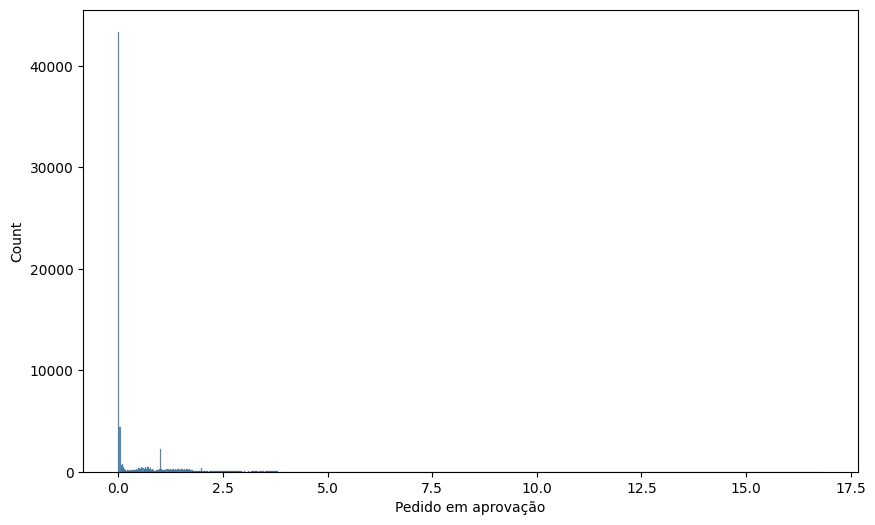

In [116]:
plt.figure(figsize=(10,6))
sns.histplot(df["Pedido em aprovação"])

In [117]:
df["Pedido em aprovação"].describe()

count    70771.000000
mean         0.415299
std          0.840497
min          0.000000
25%          0.010000
50%          0.010000
75%          0.550000
max         16.840000
Name: Pedido em aprovação, dtype: float64

In [118]:
out_inf,out_sup=outliers("Pedido em aprovação")

df=df[df["Pedido em aprovação"]<out_sup]
df

,order_id,customer_id,order_status,order_purchase_timestamp,Pedido em aprovação,order_approved_at,Separando o pedido,order_delivered_carrier_date,Pedido em transporte,order_delivered_customer_date,delivery_time,delivery_time_model,product_id,product_category_name,product_weight_g,product_length_cm,product_height_cm,product_width_cm,seller_id,seller_zip_code_prefix,payment_sequential,payment_type,payment_installments,payment_value,customer_unique_id,customer_zip_code_prefix
0,00010242fe8c5a6d1ba2dd792cb16214,3ce436f183e68e07877b285a838db11a,delivered,2017-09-13 08:59:02,0.03,2017-09-13 09:45:35,6.37,2017-09-19 18:34:16,1.21,2017-09-20 23:43:48,7.61,15.63,4244733e06e7ecb4970a6e2683c13e61,cool_stuff,650.0,28.0,9.0,14.0,48436dade18ac8b2bce089ec2a041202,27277,1,credit_card,2,72.19,871766c5855e863f6eccc05f988b23cb,28013
1,00018f77f2f0320c557190d7a144bdd3,f6dd3ec061db4e3987629fe6b26e5cce,delivered,2017-04-26 10:53:06,0.01,2017-04-26 11:05:13,8.15,2017-05-04 14:35:00,8.06,2017-05-12 16:04:24,16.22,18.55,e5f2d52b802189ee658865ca93d83a8f,pet_shop,30000.0,50.0,30.0,40.0,dd7ddc04e1b6c2c614352b383efe2d36,3471,1,credit_card,3,259.83,eb28e67c4c0b83846050ddfb8a35d051,15775
2,000229ec398224ef6ca0657da4fc703e,6489ae5e4333f3693df5ad4372dab6d3,delivered,2018-01-14 14:33:31,0.01,2018-01-14 14:48:30,1.91,2018-01-16 12:36:48,6.03,2018-01-22 13:19:16,7.95,21.39,c777355d18b72b67abbeef9df44fd0fd,moveis_decoracao,3050.0,33.0,13.0,33.0,5b51032eddd242adc84c38acab88f23d,37564,1,credit_card,5,216.87,3818d81c6709e39d06b2738a8d3a2474,35661
3,00042b26cf59d7ce69dfabb4e55b4fd9,58dbd0b2d70206bf40e62cd34e84d795,delivered,2017-02-04 13:57:51,0.01,2017-02-04 14:10:13,11.82,2017-02-16 09:46:09,13.29,2017-03-01 16:42:31,25.11,40.42,ac6c3623068f30de03045865e4e10089,ferramentas_jardim,3750.0,35.0,40.0,30.0,df560393f3a51e74553ab94004ba5c87,87900,1,credit_card,3,218.04,64b576fb70d441e8f1b2d7d446e483c5,13226
4,00048cc3ae777c65dbb7d2a0634bc1ea,816cbea969fe5b689b39cfc97a506742,delivered,2017-05-15 21:42:34,1.26,2017-05-17 03:55:27,0.30,2017-05-17 11:05:55,5.11,2017-05-22 13:44:35,6.67,21.10,ef92defde845ab8450f9d70c526ef70f,utilidades_domesticas,450.0,24.0,8.0,15.0,6426d21aca402a131fc0a5d0960a3c90,14091,1,boleto,1,34.59,85c835d128beae5b4ce8602c491bf385,38017
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
81758,fff90cdcb3b2e6cfb397d05d562fd3fe,f6cc7b845fde9d4e71361fe6fcd7ef75,delivered,2017-11-24 09:03:47,0.05,2017-11-24 10:11:58,3.52,2017-11-27 22:44:45,1.15,2017-11-29 02:24:25,4.72,13.62,764292b2b0f73f77a0272be03fdd45f3,moveis_decoracao,750.0,30.0,30.0,11.0,bd23da7354813347129d751591d1a6e2,3971,1,credit_card,1,101.73,0e1dad535a5b2359a2ff0a7d475ffb86,4119
81759,fffa82886406ccf10c7b4e35c4ff2788,a5201e1a6d71a8d21e869151bd5b4085,delivered,2017-12-18 16:33:07,0.04,2017-12-18 17:33:04,2.06,2017-12-20 18:55:00,18.98,2018-01-08 18:23:10,21.08,36.31,bbe7651fef80287a816ead73f065fc4b,esporte_lazer,2700.0,60.0,15.0,15.0,8f2ce03f928b567e3d56181ae20ae952,5141,1,credit_card,7,273.92,2a3ab9bf9639491997586882c502540a,59955
81762,fffb9224b6fc7c43ebb0904318b10b5f,4d3abb73ceb86353aeadbe698aa9d5cb,delivered,2017-10-27 16:51:00,0.42,2017-10-28 02:55:58,13.69,2017-11-10 19:31:52,7.01,2017-11-17 19:41:42,21.12,30.30,43423cdffde7fda63d0414ed38c11a73,relogios_presentes,350.0,16.0,14.0,11.0,b1fc4f64df5a0e8b6913ab38803c57a9,24440,1,boleto,1,356.76,f736308cd9952b33b90b9fe94da9c8f5,56912
81766,fffce4705a9662cd70adb13d4a31832d,29309aa813182aaddc9b259e31b870e6,delivered,2017-10-23 17:07:56,1.00,2017-10-24 17:14:25,1.92,2017-10-26 15:13:14,1.88,2017-10-28 12:22:22,4.80,17.29,72a30483855e2eafc67aee5dc2560482,esporte_lazer,967.0,21.0,24.0,19.0,c3cfdc648177fdbbbb35635a37472c53,80610,1,credit_card,3,116.85,cd79b407828f02fdbba457111c38e4c4,4039


Análise da coluna "Separando o pedido"

In [119]:
df["Separando o pedido"].describe()

count    62919.000000
mean         2.830786
std          2.751960
min         -0.950000
25%          1.030000
50%          2.010000
75%          3.780000
max         30.000000
Name: Separando o pedido, dtype: float64

In [120]:
df=df[df["Separando o pedido"]>0]
df


,order_id,customer_id,order_status,order_purchase_timestamp,Pedido em aprovação,order_approved_at,Separando o pedido,order_delivered_carrier_date,Pedido em transporte,order_delivered_customer_date,delivery_time,delivery_time_model,product_id,product_category_name,product_weight_g,product_length_cm,product_height_cm,product_width_cm,seller_id,seller_zip_code_prefix,payment_sequential,payment_type,payment_installments,payment_value,customer_unique_id,customer_zip_code_prefix
0,00010242fe8c5a6d1ba2dd792cb16214,3ce436f183e68e07877b285a838db11a,delivered,2017-09-13 08:59:02,0.03,2017-09-13 09:45:35,6.37,2017-09-19 18:34:16,1.21,2017-09-20 23:43:48,7.61,15.63,4244733e06e7ecb4970a6e2683c13e61,cool_stuff,650.0,28.0,9.0,14.0,48436dade18ac8b2bce089ec2a041202,27277,1,credit_card,2,72.19,871766c5855e863f6eccc05f988b23cb,28013
1,00018f77f2f0320c557190d7a144bdd3,f6dd3ec061db4e3987629fe6b26e5cce,delivered,2017-04-26 10:53:06,0.01,2017-04-26 11:05:13,8.15,2017-05-04 14:35:00,8.06,2017-05-12 16:04:24,16.22,18.55,e5f2d52b802189ee658865ca93d83a8f,pet_shop,30000.0,50.0,30.0,40.0,dd7ddc04e1b6c2c614352b383efe2d36,3471,1,credit_card,3,259.83,eb28e67c4c0b83846050ddfb8a35d051,15775
2,000229ec398224ef6ca0657da4fc703e,6489ae5e4333f3693df5ad4372dab6d3,delivered,2018-01-14 14:33:31,0.01,2018-01-14 14:48:30,1.91,2018-01-16 12:36:48,6.03,2018-01-22 13:19:16,7.95,21.39,c777355d18b72b67abbeef9df44fd0fd,moveis_decoracao,3050.0,33.0,13.0,33.0,5b51032eddd242adc84c38acab88f23d,37564,1,credit_card,5,216.87,3818d81c6709e39d06b2738a8d3a2474,35661
3,00042b26cf59d7ce69dfabb4e55b4fd9,58dbd0b2d70206bf40e62cd34e84d795,delivered,2017-02-04 13:57:51,0.01,2017-02-04 14:10:13,11.82,2017-02-16 09:46:09,13.29,2017-03-01 16:42:31,25.11,40.42,ac6c3623068f30de03045865e4e10089,ferramentas_jardim,3750.0,35.0,40.0,30.0,df560393f3a51e74553ab94004ba5c87,87900,1,credit_card,3,218.04,64b576fb70d441e8f1b2d7d446e483c5,13226
4,00048cc3ae777c65dbb7d2a0634bc1ea,816cbea969fe5b689b39cfc97a506742,delivered,2017-05-15 21:42:34,1.26,2017-05-17 03:55:27,0.30,2017-05-17 11:05:55,5.11,2017-05-22 13:44:35,6.67,21.10,ef92defde845ab8450f9d70c526ef70f,utilidades_domesticas,450.0,24.0,8.0,15.0,6426d21aca402a131fc0a5d0960a3c90,14091,1,boleto,1,34.59,85c835d128beae5b4ce8602c491bf385,38017
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
81758,fff90cdcb3b2e6cfb397d05d562fd3fe,f6cc7b845fde9d4e71361fe6fcd7ef75,delivered,2017-11-24 09:03:47,0.05,2017-11-24 10:11:58,3.52,2017-11-27 22:44:45,1.15,2017-11-29 02:24:25,4.72,13.62,764292b2b0f73f77a0272be03fdd45f3,moveis_decoracao,750.0,30.0,30.0,11.0,bd23da7354813347129d751591d1a6e2,3971,1,credit_card,1,101.73,0e1dad535a5b2359a2ff0a7d475ffb86,4119
81759,fffa82886406ccf10c7b4e35c4ff2788,a5201e1a6d71a8d21e869151bd5b4085,delivered,2017-12-18 16:33:07,0.04,2017-12-18 17:33:04,2.06,2017-12-20 18:55:00,18.98,2018-01-08 18:23:10,21.08,36.31,bbe7651fef80287a816ead73f065fc4b,esporte_lazer,2700.0,60.0,15.0,15.0,8f2ce03f928b567e3d56181ae20ae952,5141,1,credit_card,7,273.92,2a3ab9bf9639491997586882c502540a,59955
81762,fffb9224b6fc7c43ebb0904318b10b5f,4d3abb73ceb86353aeadbe698aa9d5cb,delivered,2017-10-27 16:51:00,0.42,2017-10-28 02:55:58,13.69,2017-11-10 19:31:52,7.01,2017-11-17 19:41:42,21.12,30.30,43423cdffde7fda63d0414ed38c11a73,relogios_presentes,350.0,16.0,14.0,11.0,b1fc4f64df5a0e8b6913ab38803c57a9,24440,1,boleto,1,356.76,f736308cd9952b33b90b9fe94da9c8f5,56912
81766,fffce4705a9662cd70adb13d4a31832d,29309aa813182aaddc9b259e31b870e6,delivered,2017-10-23 17:07:56,1.00,2017-10-24 17:14:25,1.92,2017-10-26 15:13:14,1.88,2017-10-28 12:22:22,4.80,17.29,72a30483855e2eafc67aee5dc2560482,esporte_lazer,967.0,21.0,24.0,19.0,c3cfdc648177fdbbbb35635a37472c53,80610,1,credit_card,3,116.85,cd79b407828f02fdbba457111c38e4c4,4039


<Axes: xlabel='Separando o pedido', ylabel='Count'>

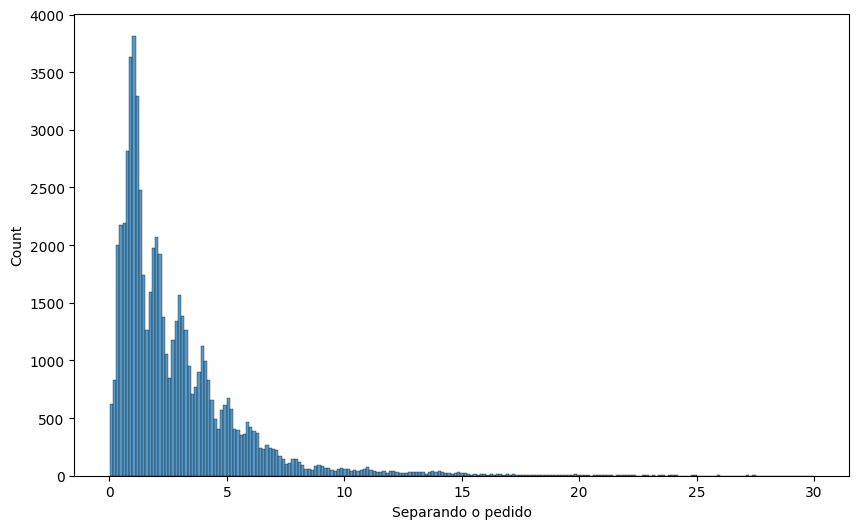

In [121]:
plt.figure(figsize=(10,6))
sns.histplot(df["Separando o pedido"])

In [122]:
df["Separando o pedido"].describe()

count    62860.000000
mean         2.833635
std          2.751664
min          0.010000
25%          1.030000
50%          2.010000
75%          3.790000
max         30.000000
Name: Separando o pedido, dtype: float64

In [123]:
out_inf,out_sup=outliers("Separando o pedido")
out_sup

7.93

In [124]:
df=df[df["Separando o pedido"]<out_sup]
df

,order_id,customer_id,order_status,order_purchase_timestamp,Pedido em aprovação,order_approved_at,Separando o pedido,order_delivered_carrier_date,Pedido em transporte,order_delivered_customer_date,delivery_time,delivery_time_model,product_id,product_category_name,product_weight_g,product_length_cm,product_height_cm,product_width_cm,seller_id,seller_zip_code_prefix,payment_sequential,payment_type,payment_installments,payment_value,customer_unique_id,customer_zip_code_prefix
0,00010242fe8c5a6d1ba2dd792cb16214,3ce436f183e68e07877b285a838db11a,delivered,2017-09-13 08:59:02,0.03,2017-09-13 09:45:35,6.37,2017-09-19 18:34:16,1.21,2017-09-20 23:43:48,7.61,15.63,4244733e06e7ecb4970a6e2683c13e61,cool_stuff,650.0,28.0,9.0,14.0,48436dade18ac8b2bce089ec2a041202,27277,1,credit_card,2,72.19,871766c5855e863f6eccc05f988b23cb,28013
2,000229ec398224ef6ca0657da4fc703e,6489ae5e4333f3693df5ad4372dab6d3,delivered,2018-01-14 14:33:31,0.01,2018-01-14 14:48:30,1.91,2018-01-16 12:36:48,6.03,2018-01-22 13:19:16,7.95,21.39,c777355d18b72b67abbeef9df44fd0fd,moveis_decoracao,3050.0,33.0,13.0,33.0,5b51032eddd242adc84c38acab88f23d,37564,1,credit_card,5,216.87,3818d81c6709e39d06b2738a8d3a2474,35661
4,00048cc3ae777c65dbb7d2a0634bc1ea,816cbea969fe5b689b39cfc97a506742,delivered,2017-05-15 21:42:34,1.26,2017-05-17 03:55:27,0.30,2017-05-17 11:05:55,5.11,2017-05-22 13:44:35,6.67,21.10,ef92defde845ab8450f9d70c526ef70f,utilidades_domesticas,450.0,24.0,8.0,15.0,6426d21aca402a131fc0a5d0960a3c90,14091,1,boleto,1,34.59,85c835d128beae5b4ce8602c491bf385,38017
5,00054e8431b9d7675808bcb819fb4a32,32e2e6ab09e778d99bf2e0ecd4898718,delivered,2017-12-10 11:53:48,0.01,2017-12-10 12:10:31,1.54,2017-12-12 01:07:48,6.87,2017-12-18 22:03:38,8.42,24.50,8d4f2bb7e93e6710a28f34fa83ee7d28,telefonia,200.0,27.0,5.0,20.0,7040e82f899a04d1b434b795a43b4617,1026,1,credit_card,1,31.75,635d9ac1680f03288e72ada3a1035803,16700
6,0005a1a1728c9d785b8e2b08b904576c,16150771dfd4776261284213b89c304e,delivered,2018-03-19 18:40:33,1.00,2018-03-20 18:35:21,7.25,2018-03-28 00:37:42,1.74,2018-03-29 18:17:31,9.98,9.22,310ae3c140ff94b03219ad0adc3c778f,beleza_saude,2000.0,30.0,12.0,16.0,a416b6a846a11724393025641d4edd5e,3702,1,credit_card,3,157.60,639d23421f5517f69d0c3d6e6564cf0e,11075
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
81756,fff8287bbae429a99bb7e8c21d151c41,6c1e92a209dbf868706caa831090941e,delivered,2018-03-17 12:11:45,0.01,2018-03-17 12:29:22,4.29,2018-03-21 19:22:25,16.61,2018-04-07 10:07:48,20.91,32.49,bee2e070c39f3dd2f6883a17a5f0da45,informatica_acessorios,175.0,20.0,20.0,20.0,4e922959ae960d389249c378d1c939f5,12327,1,credit_card,4,456.28,028c09f007292c4e3a3b10d296e47987,58075
81758,fff90cdcb3b2e6cfb397d05d562fd3fe,f6cc7b845fde9d4e71361fe6fcd7ef75,delivered,2017-11-24 09:03:47,0.05,2017-11-24 10:11:58,3.52,2017-11-27 22:44:45,1.15,2017-11-29 02:24:25,4.72,13.62,764292b2b0f73f77a0272be03fdd45f3,moveis_decoracao,750.0,30.0,30.0,11.0,bd23da7354813347129d751591d1a6e2,3971,1,credit_card,1,101.73,0e1dad535a5b2359a2ff0a7d475ffb86,4119
81759,fffa82886406ccf10c7b4e35c4ff2788,a5201e1a6d71a8d21e869151bd5b4085,delivered,2017-12-18 16:33:07,0.04,2017-12-18 17:33:04,2.06,2017-12-20 18:55:00,18.98,2018-01-08 18:23:10,21.08,36.31,bbe7651fef80287a816ead73f065fc4b,esporte_lazer,2700.0,60.0,15.0,15.0,8f2ce03f928b567e3d56181ae20ae952,5141,1,credit_card,7,273.92,2a3ab9bf9639491997586882c502540a,59955
81766,fffce4705a9662cd70adb13d4a31832d,29309aa813182aaddc9b259e31b870e6,delivered,2017-10-23 17:07:56,1.00,2017-10-24 17:14:25,1.92,2017-10-26 15:13:14,1.88,2017-10-28 12:22:22,4.80,17.29,72a30483855e2eafc67aee5dc2560482,esporte_lazer,967.0,21.0,24.0,19.0,c3cfdc648177fdbbbb35635a37472c53,80610,1,credit_card,3,116.85,cd79b407828f02fdbba457111c38e4c4,4039


Analisando a coluna "Pedido em transporte"


In [125]:
df["Pedido em transporte"].describe()

count    59985.000000
mean         8.769141
std          5.902320
min         -2.890000
25%          4.410000
50%          7.260000
75%         12.050000
max         30.400000
Name: Pedido em transporte, dtype: float64

In [126]:
df[df["Pedido em transporte"]>0]

,order_id,customer_id,order_status,order_purchase_timestamp,Pedido em aprovação,order_approved_at,Separando o pedido,order_delivered_carrier_date,Pedido em transporte,order_delivered_customer_date,delivery_time,delivery_time_model,product_id,product_category_name,product_weight_g,product_length_cm,product_height_cm,product_width_cm,seller_id,seller_zip_code_prefix,payment_sequential,payment_type,payment_installments,payment_value,customer_unique_id,customer_zip_code_prefix
0,00010242fe8c5a6d1ba2dd792cb16214,3ce436f183e68e07877b285a838db11a,delivered,2017-09-13 08:59:02,0.03,2017-09-13 09:45:35,6.37,2017-09-19 18:34:16,1.21,2017-09-20 23:43:48,7.61,15.63,4244733e06e7ecb4970a6e2683c13e61,cool_stuff,650.0,28.0,9.0,14.0,48436dade18ac8b2bce089ec2a041202,27277,1,credit_card,2,72.19,871766c5855e863f6eccc05f988b23cb,28013
2,000229ec398224ef6ca0657da4fc703e,6489ae5e4333f3693df5ad4372dab6d3,delivered,2018-01-14 14:33:31,0.01,2018-01-14 14:48:30,1.91,2018-01-16 12:36:48,6.03,2018-01-22 13:19:16,7.95,21.39,c777355d18b72b67abbeef9df44fd0fd,moveis_decoracao,3050.0,33.0,13.0,33.0,5b51032eddd242adc84c38acab88f23d,37564,1,credit_card,5,216.87,3818d81c6709e39d06b2738a8d3a2474,35661
4,00048cc3ae777c65dbb7d2a0634bc1ea,816cbea969fe5b689b39cfc97a506742,delivered,2017-05-15 21:42:34,1.26,2017-05-17 03:55:27,0.30,2017-05-17 11:05:55,5.11,2017-05-22 13:44:35,6.67,21.10,ef92defde845ab8450f9d70c526ef70f,utilidades_domesticas,450.0,24.0,8.0,15.0,6426d21aca402a131fc0a5d0960a3c90,14091,1,boleto,1,34.59,85c835d128beae5b4ce8602c491bf385,38017
5,00054e8431b9d7675808bcb819fb4a32,32e2e6ab09e778d99bf2e0ecd4898718,delivered,2017-12-10 11:53:48,0.01,2017-12-10 12:10:31,1.54,2017-12-12 01:07:48,6.87,2017-12-18 22:03:38,8.42,24.50,8d4f2bb7e93e6710a28f34fa83ee7d28,telefonia,200.0,27.0,5.0,20.0,7040e82f899a04d1b434b795a43b4617,1026,1,credit_card,1,31.75,635d9ac1680f03288e72ada3a1035803,16700
6,0005a1a1728c9d785b8e2b08b904576c,16150771dfd4776261284213b89c304e,delivered,2018-03-19 18:40:33,1.00,2018-03-20 18:35:21,7.25,2018-03-28 00:37:42,1.74,2018-03-29 18:17:31,9.98,9.22,310ae3c140ff94b03219ad0adc3c778f,beleza_saude,2000.0,30.0,12.0,16.0,a416b6a846a11724393025641d4edd5e,3702,1,credit_card,3,157.60,639d23421f5517f69d0c3d6e6564cf0e,11075
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
81756,fff8287bbae429a99bb7e8c21d151c41,6c1e92a209dbf868706caa831090941e,delivered,2018-03-17 12:11:45,0.01,2018-03-17 12:29:22,4.29,2018-03-21 19:22:25,16.61,2018-04-07 10:07:48,20.91,32.49,bee2e070c39f3dd2f6883a17a5f0da45,informatica_acessorios,175.0,20.0,20.0,20.0,4e922959ae960d389249c378d1c939f5,12327,1,credit_card,4,456.28,028c09f007292c4e3a3b10d296e47987,58075
81758,fff90cdcb3b2e6cfb397d05d562fd3fe,f6cc7b845fde9d4e71361fe6fcd7ef75,delivered,2017-11-24 09:03:47,0.05,2017-11-24 10:11:58,3.52,2017-11-27 22:44:45,1.15,2017-11-29 02:24:25,4.72,13.62,764292b2b0f73f77a0272be03fdd45f3,moveis_decoracao,750.0,30.0,30.0,11.0,bd23da7354813347129d751591d1a6e2,3971,1,credit_card,1,101.73,0e1dad535a5b2359a2ff0a7d475ffb86,4119
81759,fffa82886406ccf10c7b4e35c4ff2788,a5201e1a6d71a8d21e869151bd5b4085,delivered,2017-12-18 16:33:07,0.04,2017-12-18 17:33:04,2.06,2017-12-20 18:55:00,18.98,2018-01-08 18:23:10,21.08,36.31,bbe7651fef80287a816ead73f065fc4b,esporte_lazer,2700.0,60.0,15.0,15.0,8f2ce03f928b567e3d56181ae20ae952,5141,1,credit_card,7,273.92,2a3ab9bf9639491997586882c502540a,59955
81766,fffce4705a9662cd70adb13d4a31832d,29309aa813182aaddc9b259e31b870e6,delivered,2017-10-23 17:07:56,1.00,2017-10-24 17:14:25,1.92,2017-10-26 15:13:14,1.88,2017-10-28 12:22:22,4.80,17.29,72a30483855e2eafc67aee5dc2560482,esporte_lazer,967.0,21.0,24.0,19.0,c3cfdc648177fdbbbb35635a37472c53,80610,1,credit_card,3,116.85,cd79b407828f02fdbba457111c38e4c4,4039


In [127]:
out_inf,out_sup=outliers("Pedido em transporte")
print(out_inf,out_sup)

-7.050000000000001 23.51


<Axes: xlabel='Pedido em transporte', ylabel='Count'>

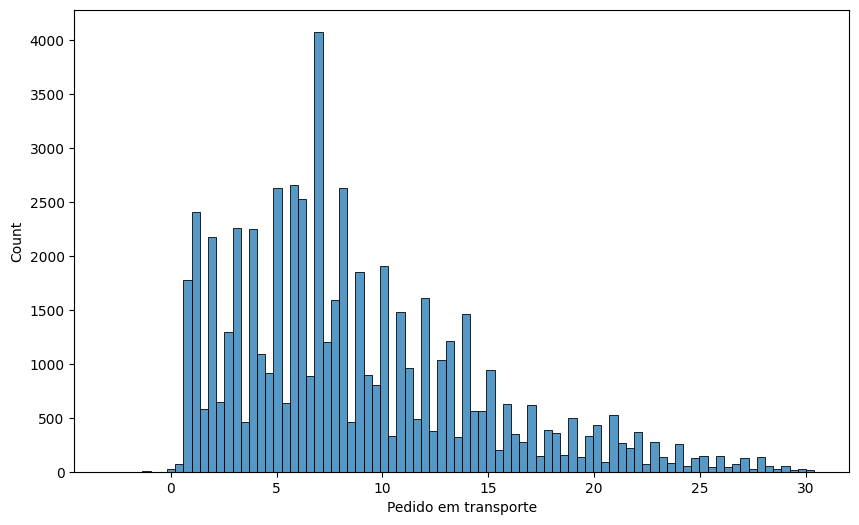

In [128]:
plt.figure(figsize=(10,6))
sns.histplot(df["Pedido em transporte"])

In [129]:
df=df[df["Pedido em transporte"]<out_sup]
df

,order_id,customer_id,order_status,order_purchase_timestamp,Pedido em aprovação,order_approved_at,Separando o pedido,order_delivered_carrier_date,Pedido em transporte,order_delivered_customer_date,delivery_time,delivery_time_model,product_id,product_category_name,product_weight_g,product_length_cm,product_height_cm,product_width_cm,seller_id,seller_zip_code_prefix,payment_sequential,payment_type,payment_installments,payment_value,customer_unique_id,customer_zip_code_prefix
0,00010242fe8c5a6d1ba2dd792cb16214,3ce436f183e68e07877b285a838db11a,delivered,2017-09-13 08:59:02,0.03,2017-09-13 09:45:35,6.37,2017-09-19 18:34:16,1.21,2017-09-20 23:43:48,7.61,15.63,4244733e06e7ecb4970a6e2683c13e61,cool_stuff,650.0,28.0,9.0,14.0,48436dade18ac8b2bce089ec2a041202,27277,1,credit_card,2,72.19,871766c5855e863f6eccc05f988b23cb,28013
2,000229ec398224ef6ca0657da4fc703e,6489ae5e4333f3693df5ad4372dab6d3,delivered,2018-01-14 14:33:31,0.01,2018-01-14 14:48:30,1.91,2018-01-16 12:36:48,6.03,2018-01-22 13:19:16,7.95,21.39,c777355d18b72b67abbeef9df44fd0fd,moveis_decoracao,3050.0,33.0,13.0,33.0,5b51032eddd242adc84c38acab88f23d,37564,1,credit_card,5,216.87,3818d81c6709e39d06b2738a8d3a2474,35661
4,00048cc3ae777c65dbb7d2a0634bc1ea,816cbea969fe5b689b39cfc97a506742,delivered,2017-05-15 21:42:34,1.26,2017-05-17 03:55:27,0.30,2017-05-17 11:05:55,5.11,2017-05-22 13:44:35,6.67,21.10,ef92defde845ab8450f9d70c526ef70f,utilidades_domesticas,450.0,24.0,8.0,15.0,6426d21aca402a131fc0a5d0960a3c90,14091,1,boleto,1,34.59,85c835d128beae5b4ce8602c491bf385,38017
5,00054e8431b9d7675808bcb819fb4a32,32e2e6ab09e778d99bf2e0ecd4898718,delivered,2017-12-10 11:53:48,0.01,2017-12-10 12:10:31,1.54,2017-12-12 01:07:48,6.87,2017-12-18 22:03:38,8.42,24.50,8d4f2bb7e93e6710a28f34fa83ee7d28,telefonia,200.0,27.0,5.0,20.0,7040e82f899a04d1b434b795a43b4617,1026,1,credit_card,1,31.75,635d9ac1680f03288e72ada3a1035803,16700
6,0005a1a1728c9d785b8e2b08b904576c,16150771dfd4776261284213b89c304e,delivered,2018-03-19 18:40:33,1.00,2018-03-20 18:35:21,7.25,2018-03-28 00:37:42,1.74,2018-03-29 18:17:31,9.98,9.22,310ae3c140ff94b03219ad0adc3c778f,beleza_saude,2000.0,30.0,12.0,16.0,a416b6a846a11724393025641d4edd5e,3702,1,credit_card,3,157.60,639d23421f5517f69d0c3d6e6564cf0e,11075
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
81756,fff8287bbae429a99bb7e8c21d151c41,6c1e92a209dbf868706caa831090941e,delivered,2018-03-17 12:11:45,0.01,2018-03-17 12:29:22,4.29,2018-03-21 19:22:25,16.61,2018-04-07 10:07:48,20.91,32.49,bee2e070c39f3dd2f6883a17a5f0da45,informatica_acessorios,175.0,20.0,20.0,20.0,4e922959ae960d389249c378d1c939f5,12327,1,credit_card,4,456.28,028c09f007292c4e3a3b10d296e47987,58075
81758,fff90cdcb3b2e6cfb397d05d562fd3fe,f6cc7b845fde9d4e71361fe6fcd7ef75,delivered,2017-11-24 09:03:47,0.05,2017-11-24 10:11:58,3.52,2017-11-27 22:44:45,1.15,2017-11-29 02:24:25,4.72,13.62,764292b2b0f73f77a0272be03fdd45f3,moveis_decoracao,750.0,30.0,30.0,11.0,bd23da7354813347129d751591d1a6e2,3971,1,credit_card,1,101.73,0e1dad535a5b2359a2ff0a7d475ffb86,4119
81759,fffa82886406ccf10c7b4e35c4ff2788,a5201e1a6d71a8d21e869151bd5b4085,delivered,2017-12-18 16:33:07,0.04,2017-12-18 17:33:04,2.06,2017-12-20 18:55:00,18.98,2018-01-08 18:23:10,21.08,36.31,bbe7651fef80287a816ead73f065fc4b,esporte_lazer,2700.0,60.0,15.0,15.0,8f2ce03f928b567e3d56181ae20ae952,5141,1,credit_card,7,273.92,2a3ab9bf9639491997586882c502540a,59955
81766,fffce4705a9662cd70adb13d4a31832d,29309aa813182aaddc9b259e31b870e6,delivered,2017-10-23 17:07:56,1.00,2017-10-24 17:14:25,1.92,2017-10-26 15:13:14,1.88,2017-10-28 12:22:22,4.80,17.29,72a30483855e2eafc67aee5dc2560482,esporte_lazer,967.0,21.0,24.0,19.0,c3cfdc648177fdbbbb35635a37472c53,80610,1,credit_card,3,116.85,cd79b407828f02fdbba457111c38e4c4,4039


Analisando um pouco a product_category_name

In [130]:

y=df["product_category_name"].value_counts()
x=y.reset_index()
x.columns=["Categoria","Contador"]
x

,Categoria,Contador
0,cama_mesa_banho,6123
1,esporte_lazer,4924
2,beleza_saude,4545
3,moveis_decoracao,3969
4,informatica_acessorios,3914
...,...,...
67,fraldas_higiene,5
68,fashion_roupa_infanto_juvenil,5
69,pc_gamer,5
70,artes_e_artesanato,2


In [131]:
categorias = df["product_category_name"].value_counts()

""" # Exibir todas as categorias de produtos
print("Categorias de Produtos:")
for categoria,valor in categorias.items():
    print(categoria,valor)
#print(categorias)
#print(categorias) """

' # Exibir todas as categorias de produtos\nprint("Categorias de Produtos:")\nfor categoria,valor in categorias.items():\n    print(categoria,valor)\n#print(categorias)\n#print(categorias) '

Categorias de Produtos:
cama_mesa_banho 6123
esporte_lazer 4924
beleza_saude 4545
relogios_presentes 2826
brinquedos 2663
cool_stuff 2602
automotivo 2115
perfumaria 2024
papelaria 1430
pet_shop 935
consoles_games 643
instrumentos_musicais 344
livros_interesse_geral 272
casa_construcao 207
market_place 205
audio 204
climatizacao 130
industria_comercio_e_negocios 116
agro_industria_e_comercio 103
livros_tecnicos 94
artigos_de_natal 72
sinalizacao_e_seguranca 52
livros_importados 25
flores 19
musica 14
cine_foto 14
artigos_de_festas 14
seguros_e_servicos 1

artes_e_artesanato 2
artes 80

pc_gamer 5
pcs 130

bebes 1521
fraldas_higiene 5

construcao_ferramentas_ferramentas 48
construcao_ferramentas_construcao 241
construcao_ferramentas_jardim 110
construcao_ferramentas_iluminacao 51
construcao_ferramentas_seguranca 59
ferramentas_jardim 2278

eletrodomesticos_2 99
eletrodomesticos 376

alimentos_bebidas 142
bebidas 141
alimentos 184

cds_dvds_musicais 10
dvds_blu_ray 38

eletroportateis 390
portateis_casa_forno_e_cafe 22

casa_conforto 276
casa_conforto_2 16

utilidades_domesticas 3191
la_cuisine 15

informatica_acessorios 3914
tablets_impressao_imagem 68
eletronicos 1507

fashion_roupa_infanto_juvenil 5
fashion_roupa_feminina 24
fashion_esporte 
fashion_roupa_masculina 82
fashion_underwear_e_moda_praia 81
fashion_calcados 167
fashion_bolsas_e_acessorios 1303
malas_acessorios 755

moveis_sala 222
moveis_quarto 38
moveis_colchao_e_estofado 32
moveis_cozinha_area_de_servico_jantar_e_jardim 132
moveis_decoracao 3969
moveis_escritorio 321

telefonia 2589
telefonia_fixa 131

In [132]:
categorias

product_category_name
cama_mesa_banho                  6123
esporte_lazer                    4924
beleza_saude                     4545
moveis_decoracao                 3969
informatica_acessorios           3914
                                 ... 
fraldas_higiene                     5
fashion_roupa_infanto_juvenil       5
pc_gamer                            5
artes_e_artesanato                  2
seguros_e_servicos                  1
Name: count, Length: 72, dtype: int64

In [133]:

categorias_a_agrupar = {
    'construcao_ferramentas_ferramentas': 'construcao_ferramentas',
    'construcao_ferramentas_construcao': 'construcao_ferramentas',
    'construcao_ferramentas_jardim': 'construcao_ferramentas',
    'construcao_ferramentas_iluminacao': 'construcao_ferramentas',
    'construcao_ferramentas_seguranca': 'construcao_ferramentas',
    'ferramentas_jardim': 'construcao_ferramentas',
    'moveis_sala': 'moveis',
    'moveis_quarto': 'moveis',
    'moveis_colchao_e_estofado': 'moveis',
    'moveis_cozinha_area_de_servico_jantar_e_jardim': 'moveis',
    'moveis_decoracao': 'moveis',
    'moveis_escritorio': 'moveis',
    'pc_gamer': 'pcs',
    'artes_e_artesanato':'artes',
    'telefonia_fixa':'telefonia',
    'alimentos': 'alimentos_bebidas',
    'bebidas': 'alimentos_bebidas',
    'cds_dvds_musicais': 'cds_dvds',
    'dvds_blu_ray': 'cds_dvds',
    'portateis_casa_forno_e_cafe': 'eletroportateis',
    'casa_conforto_2': 'casa_conforto',
    'eletrodomesticos_2': 'eletrodomesticos',
    'malas_acessorios':'fashion',
    'fashion_bolsas_e_acessorios':'fashion',
    'fashion_calcados':'fashion',
    'fashion_underwear_e_moda_praia':'fashion',
    'fashion_roupa_masculina':'fashion',
    'fashion_esporte':'fashion' ,
    'fashion_roupa_feminina':'fashion',
    'fashion_roupa_infanto_juvenil':'fashion',
    'eletronicos':'informatica_acessorios',
    'tablets_impressao_imagem':'informatica_acessorios',
    'la_cuisine':'utilidades_domesticas',
    'fraldas_higiene': 'bebes'
    
}

df['product_category_name'].replace(categorias_a_agrupar, inplace=True)

df

C:\Users\natal\AppData\Local\Temp\ipykernel_1848\1739852591.py:39: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['product_category_name'].replace(categorias_a_agrupar, inplace=True)
C:\Users\natal\AppData\Local\Temp\ipykernel_1848\1739852591.py:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['product_category_name'].replace(categorias_

,order_id,customer_id,order_status,order_purchase_timestamp,Pedido em aprovação,order_approved_at,Separando o pedido,order_delivered_carrier_date,Pedido em transporte,order_delivered_customer_date,delivery_time,delivery_time_model,product_id,product_category_name,product_weight_g,product_length_cm,product_height_cm,product_width_cm,seller_id,seller_zip_code_prefix,payment_sequential,payment_type,payment_installments,payment_value,customer_unique_id,customer_zip_code_prefix
0,00010242fe8c5a6d1ba2dd792cb16214,3ce436f183e68e07877b285a838db11a,delivered,2017-09-13 08:59:02,0.03,2017-09-13 09:45:35,6.37,2017-09-19 18:34:16,1.21,2017-09-20 23:43:48,7.61,15.63,4244733e06e7ecb4970a6e2683c13e61,cool_stuff,650.0,28.0,9.0,14.0,48436dade18ac8b2bce089ec2a041202,27277,1,credit_card,2,72.19,871766c5855e863f6eccc05f988b23cb,28013
2,000229ec398224ef6ca0657da4fc703e,6489ae5e4333f3693df5ad4372dab6d3,delivered,2018-01-14 14:33:31,0.01,2018-01-14 14:48:30,1.91,2018-01-16 12:36:48,6.03,2018-01-22 13:19:16,7.95,21.39,c777355d18b72b67abbeef9df44fd0fd,moveis,3050.0,33.0,13.0,33.0,5b51032eddd242adc84c38acab88f23d,37564,1,credit_card,5,216.87,3818d81c6709e39d06b2738a8d3a2474,35661
4,00048cc3ae777c65dbb7d2a0634bc1ea,816cbea969fe5b689b39cfc97a506742,delivered,2017-05-15 21:42:34,1.26,2017-05-17 03:55:27,0.30,2017-05-17 11:05:55,5.11,2017-05-22 13:44:35,6.67,21.10,ef92defde845ab8450f9d70c526ef70f,utilidades_domesticas,450.0,24.0,8.0,15.0,6426d21aca402a131fc0a5d0960a3c90,14091,1,boleto,1,34.59,85c835d128beae5b4ce8602c491bf385,38017
5,00054e8431b9d7675808bcb819fb4a32,32e2e6ab09e778d99bf2e0ecd4898718,delivered,2017-12-10 11:53:48,0.01,2017-12-10 12:10:31,1.54,2017-12-12 01:07:48,6.87,2017-12-18 22:03:38,8.42,24.50,8d4f2bb7e93e6710a28f34fa83ee7d28,telefonia,200.0,27.0,5.0,20.0,7040e82f899a04d1b434b795a43b4617,1026,1,credit_card,1,31.75,635d9ac1680f03288e72ada3a1035803,16700
6,0005a1a1728c9d785b8e2b08b904576c,16150771dfd4776261284213b89c304e,delivered,2018-03-19 18:40:33,1.00,2018-03-20 18:35:21,7.25,2018-03-28 00:37:42,1.74,2018-03-29 18:17:31,9.98,9.22,310ae3c140ff94b03219ad0adc3c778f,beleza_saude,2000.0,30.0,12.0,16.0,a416b6a846a11724393025641d4edd5e,3702,1,credit_card,3,157.60,639d23421f5517f69d0c3d6e6564cf0e,11075
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
81756,fff8287bbae429a99bb7e8c21d151c41,6c1e92a209dbf868706caa831090941e,delivered,2018-03-17 12:11:45,0.01,2018-03-17 12:29:22,4.29,2018-03-21 19:22:25,16.61,2018-04-07 10:07:48,20.91,32.49,bee2e070c39f3dd2f6883a17a5f0da45,informatica_acessorios,175.0,20.0,20.0,20.0,4e922959ae960d389249c378d1c939f5,12327,1,credit_card,4,456.28,028c09f007292c4e3a3b10d296e47987,58075
81758,fff90cdcb3b2e6cfb397d05d562fd3fe,f6cc7b845fde9d4e71361fe6fcd7ef75,delivered,2017-11-24 09:03:47,0.05,2017-11-24 10:11:58,3.52,2017-11-27 22:44:45,1.15,2017-11-29 02:24:25,4.72,13.62,764292b2b0f73f77a0272be03fdd45f3,moveis,750.0,30.0,30.0,11.0,bd23da7354813347129d751591d1a6e2,3971,1,credit_card,1,101.73,0e1dad535a5b2359a2ff0a7d475ffb86,4119
81759,fffa82886406ccf10c7b4e35c4ff2788,a5201e1a6d71a8d21e869151bd5b4085,delivered,2017-12-18 16:33:07,0.04,2017-12-18 17:33:04,2.06,2017-12-20 18:55:00,18.98,2018-01-08 18:23:10,21.08,36.31,bbe7651fef80287a816ead73f065fc4b,esporte_lazer,2700.0,60.0,15.0,15.0,8f2ce03f928b567e3d56181ae20ae952,5141,1,credit_card,7,273.92,2a3ab9bf9639491997586882c502540a,59955
81766,fffce4705a9662cd70adb13d4a31832d,29309aa813182aaddc9b259e31b870e6,delivered,2017-10-23 17:07:56,1.00,2017-10-24 17:14:25,1.92,2017-10-26 15:13:14,1.88,2017-10-28 12:22:22,4.80,17.29,72a30483855e2eafc67aee5dc2560482,esporte_lazer,967.0,21.0,24.0,19.0,c3cfdc648177fdbbbb35635a37472c53,80610,1,credit_card,3,116.85,cd79b407828f02fdbba457111c38e4c4,4039


In [134]:
df["product_category_name"].value_counts()

product_category_name
cama_mesa_banho                  6123
informatica_acessorios           5489
esporte_lazer                    4924
moveis                           4714
beleza_saude                     4545
utilidades_domesticas            3206
relogios_presentes               2826
construcao_ferramentas           2787
telefonia                        2720
brinquedos                       2663
cool_stuff                       2602
fashion                          2438
automotivo                       2115
perfumaria                       2024
bebes                            1526
papelaria                        1430
pet_shop                          935
consoles_games                    643
eletrodomesticos                  475
alimentos_bebidas                 467
eletroportateis                   412
instrumentos_musicais             344
casa_conforto                     292
livros_interesse_geral            272
casa_construcao                   207
market_place                

In [135]:
df=df[df["product_category_name"]!="seguros_e_servicos"]
df["product_category_name"].value_counts()

product_category_name
cama_mesa_banho                  6123
informatica_acessorios           5489
esporte_lazer                    4924
moveis                           4714
beleza_saude                     4545
utilidades_domesticas            3206
relogios_presentes               2826
construcao_ferramentas           2787
telefonia                        2720
brinquedos                       2663
cool_stuff                       2602
fashion                          2438
automotivo                       2115
perfumaria                       2024
bebes                            1526
papelaria                        1430
pet_shop                          935
consoles_games                    643
eletrodomesticos                  475
alimentos_bebidas                 467
eletroportateis                   412
instrumentos_musicais             344
casa_conforto                     292
livros_interesse_geral            272
casa_construcao                   207
market_place                

In [136]:
df["payment_type"].unique()

array(['credit_card', 'boleto', 'voucher', 'debit_card'], dtype=object)

In [137]:
df['seller_zip_code_prefix'] = df['seller_zip_code_prefix'].astype(str).apply(lambda x: x.zfill(5) if len(x) == 4 else x) + '000'
df['customer_zip_code_prefix'] = df['customer_zip_code_prefix'].astype(str).apply(lambda x: x.zfill(5) if len(x) == 4 else x) + '000'

df

C:\Users\natal\AppData\Local\Temp\ipykernel_1848\760819855.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['seller_zip_code_prefix'] = df['seller_zip_code_prefix'].astype(str).apply(lambda x: x.zfill(5) if len(x) == 4 else x) + '000'
C:\Users\natal\AppData\Local\Temp\ipykernel_1848\760819855.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['customer_zip_code_prefix'] = df['customer_zip_code_prefix'].astype(str).apply(lambda x: x.zfill(5) if len(x) == 4 else x) + '000'


,order_id,customer_id,order_status,order_purchase_timestamp,Pedido em aprovação,order_approved_at,Separando o pedido,order_delivered_carrier_date,Pedido em transporte,order_delivered_customer_date,delivery_time,delivery_time_model,product_id,product_category_name,product_weight_g,product_length_cm,product_height_cm,product_width_cm,seller_id,seller_zip_code_prefix,payment_sequential,payment_type,payment_installments,payment_value,customer_unique_id,customer_zip_code_prefix
0,00010242fe8c5a6d1ba2dd792cb16214,3ce436f183e68e07877b285a838db11a,delivered,2017-09-13 08:59:02,0.03,2017-09-13 09:45:35,6.37,2017-09-19 18:34:16,1.21,2017-09-20 23:43:48,7.61,15.63,4244733e06e7ecb4970a6e2683c13e61,cool_stuff,650.0,28.0,9.0,14.0,48436dade18ac8b2bce089ec2a041202,27277000,1,credit_card,2,72.19,871766c5855e863f6eccc05f988b23cb,28013000
2,000229ec398224ef6ca0657da4fc703e,6489ae5e4333f3693df5ad4372dab6d3,delivered,2018-01-14 14:33:31,0.01,2018-01-14 14:48:30,1.91,2018-01-16 12:36:48,6.03,2018-01-22 13:19:16,7.95,21.39,c777355d18b72b67abbeef9df44fd0fd,moveis,3050.0,33.0,13.0,33.0,5b51032eddd242adc84c38acab88f23d,37564000,1,credit_card,5,216.87,3818d81c6709e39d06b2738a8d3a2474,35661000
4,00048cc3ae777c65dbb7d2a0634bc1ea,816cbea969fe5b689b39cfc97a506742,delivered,2017-05-15 21:42:34,1.26,2017-05-17 03:55:27,0.30,2017-05-17 11:05:55,5.11,2017-05-22 13:44:35,6.67,21.10,ef92defde845ab8450f9d70c526ef70f,utilidades_domesticas,450.0,24.0,8.0,15.0,6426d21aca402a131fc0a5d0960a3c90,14091000,1,boleto,1,34.59,85c835d128beae5b4ce8602c491bf385,38017000
5,00054e8431b9d7675808bcb819fb4a32,32e2e6ab09e778d99bf2e0ecd4898718,delivered,2017-12-10 11:53:48,0.01,2017-12-10 12:10:31,1.54,2017-12-12 01:07:48,6.87,2017-12-18 22:03:38,8.42,24.50,8d4f2bb7e93e6710a28f34fa83ee7d28,telefonia,200.0,27.0,5.0,20.0,7040e82f899a04d1b434b795a43b4617,01026000,1,credit_card,1,31.75,635d9ac1680f03288e72ada3a1035803,16700000
6,0005a1a1728c9d785b8e2b08b904576c,16150771dfd4776261284213b89c304e,delivered,2018-03-19 18:40:33,1.00,2018-03-20 18:35:21,7.25,2018-03-28 00:37:42,1.74,2018-03-29 18:17:31,9.98,9.22,310ae3c140ff94b03219ad0adc3c778f,beleza_saude,2000.0,30.0,12.0,16.0,a416b6a846a11724393025641d4edd5e,03702000,1,credit_card,3,157.60,639d23421f5517f69d0c3d6e6564cf0e,11075000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
81756,fff8287bbae429a99bb7e8c21d151c41,6c1e92a209dbf868706caa831090941e,delivered,2018-03-17 12:11:45,0.01,2018-03-17 12:29:22,4.29,2018-03-21 19:22:25,16.61,2018-04-07 10:07:48,20.91,32.49,bee2e070c39f3dd2f6883a17a5f0da45,informatica_acessorios,175.0,20.0,20.0,20.0,4e922959ae960d389249c378d1c939f5,12327000,1,credit_card,4,456.28,028c09f007292c4e3a3b10d296e47987,58075000
81758,fff90cdcb3b2e6cfb397d05d562fd3fe,f6cc7b845fde9d4e71361fe6fcd7ef75,delivered,2017-11-24 09:03:47,0.05,2017-11-24 10:11:58,3.52,2017-11-27 22:44:45,1.15,2017-11-29 02:24:25,4.72,13.62,764292b2b0f73f77a0272be03fdd45f3,moveis,750.0,30.0,30.0,11.0,bd23da7354813347129d751591d1a6e2,03971000,1,credit_card,1,101.73,0e1dad535a5b2359a2ff0a7d475ffb86,04119000
81759,fffa82886406ccf10c7b4e35c4ff2788,a5201e1a6d71a8d21e869151bd5b4085,delivered,2017-12-18 16:33:07,0.04,2017-12-18 17:33:04,2.06,2017-12-20 18:55:00,18.98,2018-01-08 18:23:10,21.08,36.31,bbe7651fef80287a816ead73f065fc4b,esporte_lazer,2700.0,60.0,15.0,15.0,8f2ce03f928b567e3d56181ae20ae952,05141000,1,credit_card,7,273.92,2a3ab9bf9639491997586882c502540a,59955000
81766,fffce4705a9662cd70adb13d4a31832d,29309aa813182aaddc9b259e31b870e6,delivered,2017-10-23 17:07:56,1.00,2017-10-24 17:14:25,1.92,2017-10-26 15:13:14,1.88,2017-10-28 12:22:22,4.80,17.29,72a30483855e2eafc67aee5dc2560482,esporte_lazer,967.0,21.0,24.0,19.0,c3cfdc648177fdbbbb35635a37472c53,80610000,1,credit_card,3,116.85,cd79b407828f02fdbba457111c38e4c4,04039000


C:\Users\natal\AppData\Local\Temp\ipykernel_1848\3754597896.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['seller_first_digit'] = df['seller_zip_code_prefix'].astype(str).str[0].astype(int)
C:\Users\natal\AppData\Local\Temp\ipykernel_1848\3754597896.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['customer_first_digit'] = df['customer_zip_code_prefix'].astype(str).str[0].astype(int)


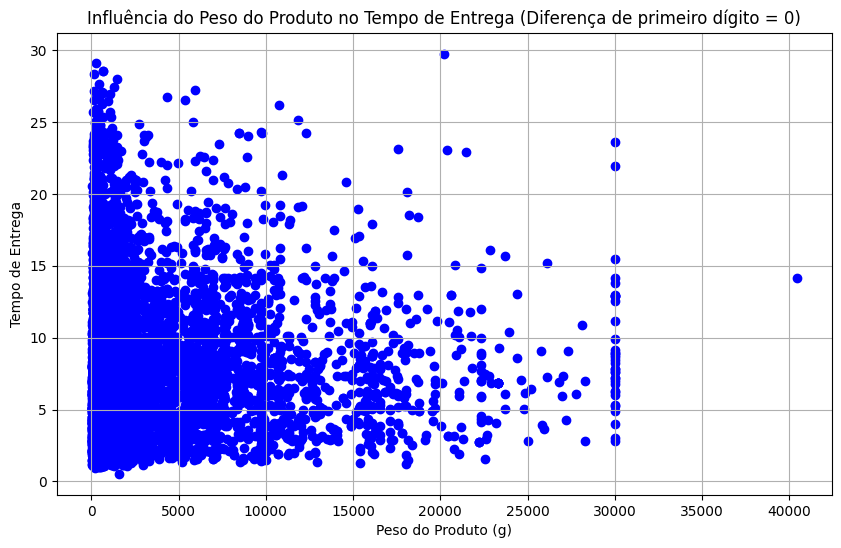

In [146]:
df['seller_first_digit'] = df['seller_zip_code_prefix'].astype(str).str[0].astype(int)
df['customer_first_digit'] = df['customer_zip_code_prefix'].astype(str).str[0].astype(int)

# Filtrando os casos onde a diferença entre os primeiros dígitos é zero
df_filtered = df[df['seller_first_digit'] - df['customer_first_digit'] == 0]

# Plotando um gráfico para mostrar como o product_weight_g influencia no delivery_time
plt.figure(figsize=(10, 6))
plt.scatter(df_filtered['product_weight_g'], df_filtered['delivery_time'], color='blue')
plt.xlabel('Peso do Produto (g)')
plt.ylabel('Tempo de Entrega')
plt.title('Influência do Peso do Produto no Tempo de Entrega (Diferença de primeiro dígito = 0)')
plt.grid(True)
plt.show()

C:\Users\natal\AppData\Local\Temp\ipykernel_1848\1265054987.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['seller_first_digit'] = df['seller_zip_code_prefix'].astype(str).str[0].astype(int)
C:\Users\natal\AppData\Local\Temp\ipykernel_1848\1265054987.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['customer_first_digit'] = df['customer_zip_code_prefix'].astype(str).str[0].astype(int)
C:\Users\natal\AppData\Local\Temp\ipykernel_1848\1265054987.py:5: SettingWithCopyWarning: 
A value is trying t

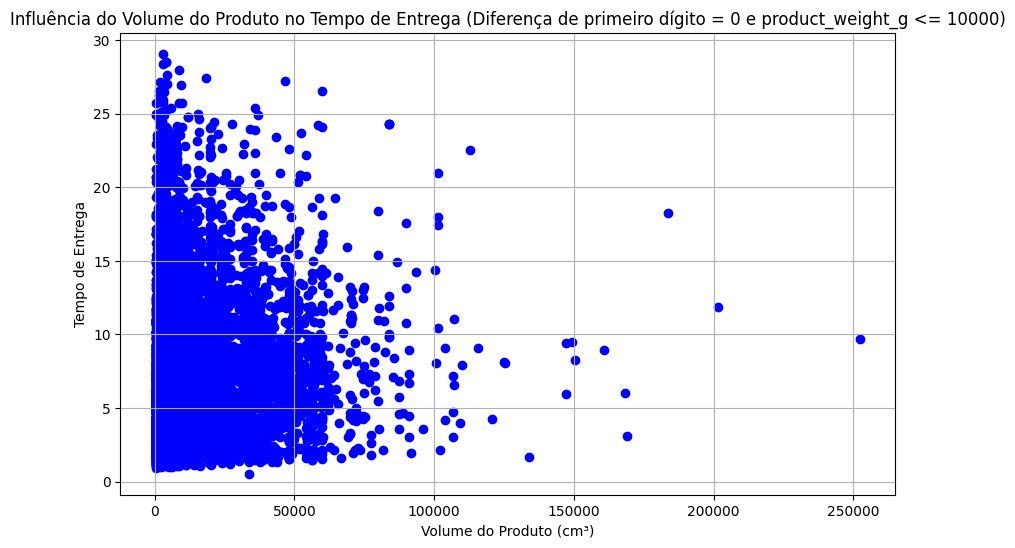

In [159]:
df['seller_first_digit'] = df['seller_zip_code_prefix'].astype(str).str[0].astype(int)
df['customer_first_digit'] = df['customer_zip_code_prefix'].astype(str).str[0].astype(int)

# Calculando o volume do produto em cm³
df['product_volume_cm3'] = df['product_length_cm'] * df['product_height_cm'] * df['product_width_cm']

# Filtrando os casos onde a diferença entre os primeiros dígitos é zero e o preço do produto é <= 1000
df_filtered = df[(df['seller_first_digit'] - df['customer_first_digit'] == 0) & (df['product_weight_g'] <= 10000)]

# Plotando um gráfico para mostrar como o volume do produto influencia no tempo de entrega
plt.figure(figsize=(10, 6))
plt.scatter(df_filtered['product_volume_cm3'], df_filtered['delivery_time'], color='blue')
plt.xlabel('Volume do Produto (cm³)')
plt.ylabel('Tempo de Entrega')
plt.title('Influência do Volume do Produto no Tempo de Entrega (Diferença de primeiro dígito = 0 e product_weight_g <= 10000)')
plt.grid(True)
plt.show()

C:\Users\natal\AppData\Local\Temp\ipykernel_1848\3148747312.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['seller_first_three_digits'] = df['seller_zip_code_prefix'].astype(str).str[:3].astype(int)
C:\Users\natal\AppData\Local\Temp\ipykernel_1848\3148747312.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['customer_first_three_digits'] = df['customer_zip_code_prefix'].astype(str).str[:3].astype(int)
C:\Users\natal\AppData\Local\Temp\ipykernel_1848\3148747312.py:5: SettingWithCopyWarning: 
A v

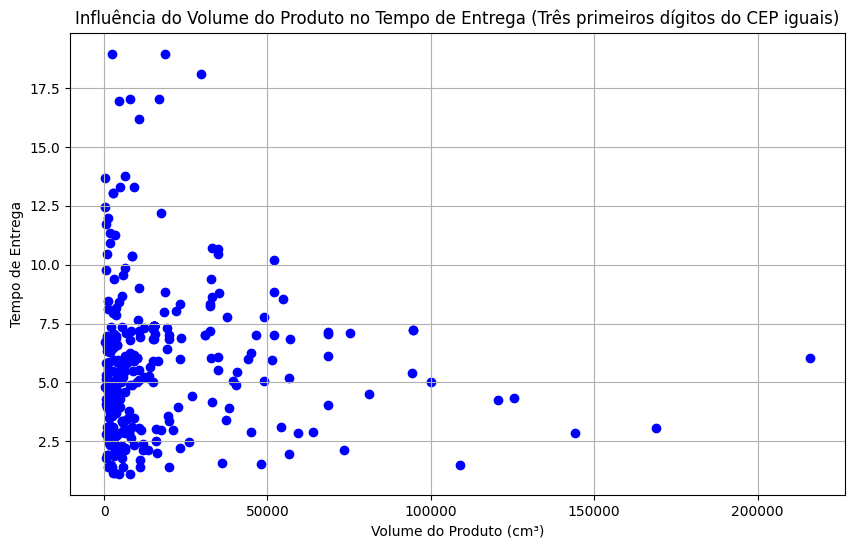

In [170]:
df['seller_first_three_digits'] = df['seller_zip_code_prefix'].astype(str).str[:3].astype(int)
df['customer_first_three_digits'] = df['customer_zip_code_prefix'].astype(str).str[:3].astype(int)

# Calculando o volume do produto em cm³
df['product_volume_cm3'] = df['product_length_cm'] * df['product_height_cm'] * df['product_width_cm']

# Filtrando os casos onde os quatro primeiros dígitos são iguais
df_filtered = df[df['seller_first_three_digits'] == df['customer_first_three_digits']]


# Plotando um gráfico para mostrar como o volume do produto influencia no tempo de entrega
plt.figure(figsize=(10, 6))
plt.scatter(df_filtered['product_volume_cm3'], df_filtered['delivery_time'], color='blue')
plt.xlabel('Volume do Produto (cm³)')
plt.ylabel('Tempo de Entrega')
plt.title('Influência do Volume do Produto no Tempo de Entrega (Três primeiros dígitos do CEP iguais)')
plt.grid(True)
plt.show()